In [9]:
!pip install transformers
!pip install torch


In [10]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

In [11]:
import csv
import pandas as pd

In [12]:
# Load the pre-trained BERT model.
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/bert-tiny-finetuned-sms-spam-detection")

In [13]:
# Load the BERT tokenizer.
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [14]:
# Define a function to classify an email.
def classify_email(email):
    """Classifies an email as spam or not spam.

    Args:
        email: A string containing the email to classify.

    Returns:
        A string indicating whether the email is spam or not spam.
    """

    tokens = tokenizer(email, return_tensors="pt")
    input_ids = tokens.get('input_ids')

    logits = model(input_ids)
    logits_tensor = logits.logits
    predictions = torch.argmax(logits_tensor, dim=-1)

    if predictions == 0:
        return "Spam"
    else:
        return "Ham"

In [15]:
# Read the CSV file containing the emails.
emails_df = pd.read_csv("SpamHamPreprocessedDataset.csv")

In [16]:
emails_df

,Subject,Label,Generatedbody
0,URGENT: Your bank account has been compromised!,Spam,URGENT: Your bank account has been compromised...
1,FREE Viagra for men!,Spam,FREE Viagra for men!\nSent on the run\nOn Mar ...
2,You've won the lottery!,Spam,You've won the lottery!\nSent from my iPhone\n...
3,Your credit card has been declined.,Spam,Your credit card has been declined.\nPlease up...
4,Your computer is infected with a virus!,Spam,Your computer is infected with a virus!\nSent ...
5,Lose weight fast and easy!,Spam,Lose weight fast and easy!\nSent from my iPhon...
6,Make money online quickly and easily!,Spam,Make money online quickly and easily!\nView th...
7,Get rich quick!,Spam,"Get rich quick!\nDear Jane,\nCongratulations o..."
8,Invest in our new cryptocurrency and earn big ...,Spam,Invest in our new cryptocurrency and earn big ...
9,Click here to claim your free gift!,Spam,Click here to claim your free gift!\nEmail not...


In [17]:
import torch
# Add a new column to the DataFrame to store the spam/ham classification.
emails_df["spam_or_ham"] = emails_df["Generatedbody"].apply(classify_email)

In [18]:
# Save the updated DataFrame to a new CSV file.
emails_df.to_csv("EmailClassification_mrm8488 _ bert-tiny-finetuned-sms-spam-detection.csv", index=False)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a confusion matrix
confusion = confusion_matrix(emails_df["Label"], emails_df["spam_or_ham"], labels=["Ham", "Spam"])

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 7  8]
 [10  6]]


In [20]:
# Create a classification report
report = classification_report(emails_df["Label"], emails_df["spam_or_ham"], target_names=["Ham", "Spam"])

# Print the classification report
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         Ham       0.41      0.47      0.44        15
        Spam       0.43      0.38      0.40        16

    accuracy                           0.42        31
   macro avg       0.42      0.42      0.42        31
weighted avg       0.42      0.42      0.42        31



In [21]:
!pip install matplotlib seaborn

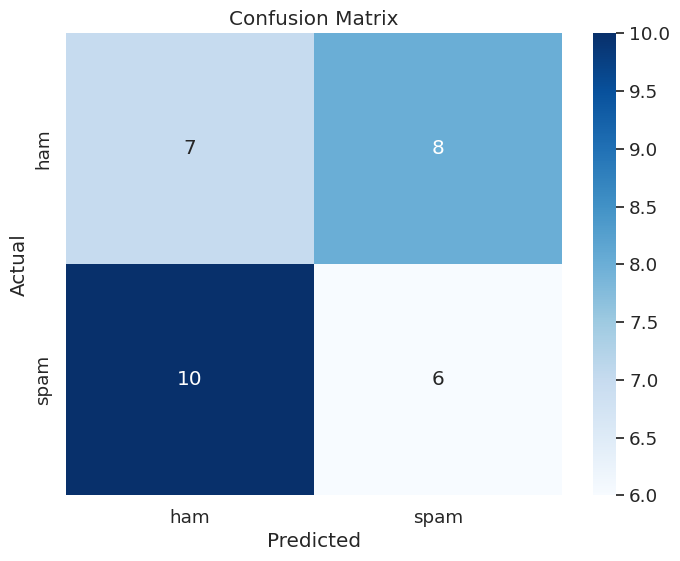

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for the matrix
labels = ["ham", "spam"]

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

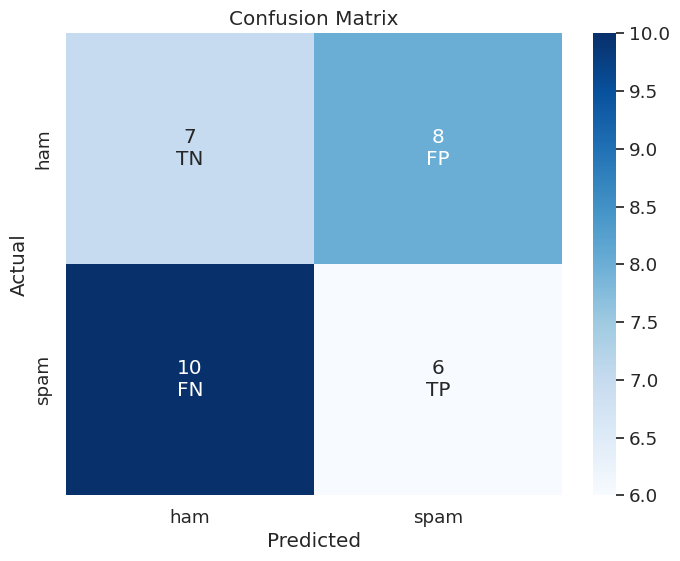

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for the matrix
labels = ["ham", "spam"]

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a custom annotation array to label the cells with values and labels without hardcoding
annotations = []
for i in range(len(labels)):
    row = []
    for j in range(len(labels)):
        cell_label = f"{confusion[i, j]}\n"
        if i == 0:
            cell_label += "TN" if j == 0 else "FP"
        else:
            cell_label += "FN" if j == 0 else "TP"
        row.append(cell_label)
    annotations.append(row)

# Create the heatmap with custom annotations
sns.heatmap(confusion, annot=annotations, fmt="", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Customize the axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [24]:
!pip install tabulate

In [25]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Get the classification report as a dictionary
report_dict = classification_report(emails_df["Label"], emails_df["spam_or_ham"], target_names=["ham", "spam"], output_dict=True)

# Create a nicely formatted table using tabulate
report_table = []
for label, metrics in report_dict.items():
    if label in ["ham", "spam"]:
        report_table.append([label, metrics["precision"], metrics["recall"], metrics["f1-score"], metrics["support"]])

# Add a header row to the table
header = ["Class", "Precision", "Recall", "F1-Score", "Support"]
report_table.insert(0, header)

# Print the formatted classification report
print(tabulate(report_table, headers="firstrow", tablefmt="pretty"))

+-------+---------------------+--------------------+---------------------+---------+
| Class |      Precision      |       Recall       |      F1-Score       | Support |
+-------+---------------------+--------------------+---------------------+---------+
|  ham  | 0.4117647058823529  | 0.4666666666666667 | 0.43749999999999994 |   15    |
| spam  | 0.42857142857142855 |       0.375        | 0.39999999999999997 |   16    |
+-------+---------------------+--------------------+---------------------+---------+


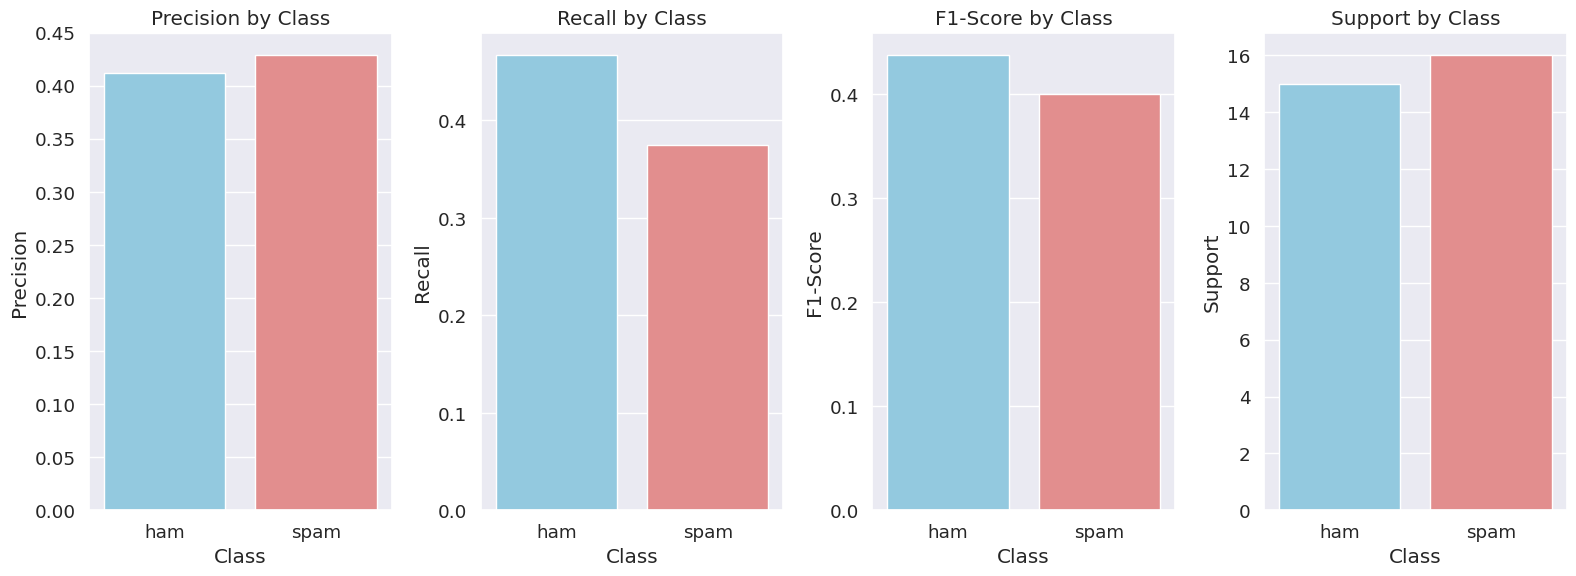

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report_dict = classification_report(emails_df["Label"], emails_df["spam_or_ham"], target_names=["ham", "spam"], output_dict=True)

# Extract relevant metrics for each class
class_names = ["ham", "spam"]
metrics = {
    "Precision": [report_dict[class_name]["precision"] for class_name in class_names],
    "Recall": [report_dict[class_name]["recall"] for class_name in class_names],
    "F1-Score": [report_dict[class_name]["f1-score"] for class_name in class_names],
    "Support": [report_dict[class_name]["support"] for class_name in class_names],
}

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(16, 6))

# Customize the colors
colors = ["skyblue", "lightcoral"]

# Plot each metric
for i, (metric_name, values) in enumerate(metrics.items()):
    sns.barplot(x=class_names, y=values, ax=axes[i], palette=colors)
    axes[i].set_title(f"{metric_name} by Class")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(metric_name)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()